<a href="https://colab.research.google.com/github/tarunn107/UnsupervisedML/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering and Sentiment Analysis



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual
##### **Name              -**     Tarun Suriyakumar

# **Project Summary -**


This project uses advanced data analytics to understand restaurants and customer feedback on Zomato, an online food delivery platform. The data includes essential restaurant details like name, location, cuisines, cost, ratings, and reviews. We clean and preprocess the data to make it suitable for analysis by removing duplicates and handling missing values.

Next, we apply clustering to group similar restaurants using the k-means algorithm. We consider features like location, cuisines, and cost, determining the optimal number of clusters using the elbow method.

Sentiment analysis on user reviews helps us understand overall sentiments. Reviews are classified as positive, negative, or neutral, and common words are visualized through word clouds.

The analysis reveals that city restaurants cluster into groups based on location, cuisines, and cost. Overall sentiment analysis indicates a positive customer sentiment.

This project shows the effectiveness of clustering and sentiment analysis in understanding Zomato's restaurant data, providing valuable insights for informed decision-making by restaurants and customers. Expanding the project to other cities or countries could offer insights into diverse eating habits and preferences.

# **GitHub Link -**

https://github.com/tarunn107/UnsupervisedML

# **Problem Statement**




The project deals with the ever-changing restaurant industry by using machine learning to group restaurants and analyze customer reviews. It aims to help restaurant owners understand customer expectations better. Analyzing Zomato data, including cuisine, costs, and reviews, the project wants to help customers find great local restaurants and assist the company in growing and improving. The goal is to use reviewer information to figure out sentiments. We want to provide helpful data-driven insights for customers and Zomato in navigating the restaurant scene.



# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [ ]:
#importing contraction
!pip install contractions
!pip install gensim
import gensim
from gensim import corpora

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.3 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Dataset First View

In [ ]:
#creating dataframes for restaurants, reviews
restaurant_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Unsupervised ML/Zomato Restaurant names and Metadata.csv")

review_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Unsupervised ML/Zomato Restaurant reviews.csv")



In [ ]:
#First look at dataframes
restaurant_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
#First look at dataframes
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('Number of rows,columns is',restaurant_df.shape)
print('Total number of elements is',restaurant_df.size)

Number of rows,columns is (105, 6)
Total number of elements is 630


In [ ]:
# Dataset Rows & Columns count
print('Number of rows,columns is',review_df.shape)
print('Total number of elements is',review_df.size)

Number of rows,columns is (10000, 7)
Total number of elements is 70000


### Dataset Information

We take a look at the types of columns in the dataset

In [ ]:
restaurant_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [ ]:
review_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
restaurant_df.duplicated().sum()

0

In [ ]:
# Dataset Duplicate Value Count
review_df.duplicated().sum()

36

In [ ]:
review_df[review_df.duplicated()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


#### Missing Values/Null Values

For the restaurant df, details of missing/null values and visualisation is as follows






In [ ]:
# Missing Values/Null Values Count
restaurant_df.isna().sum()


Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Text(0.5, 1.0, 'Missing/Nulls of Restaurant Data')

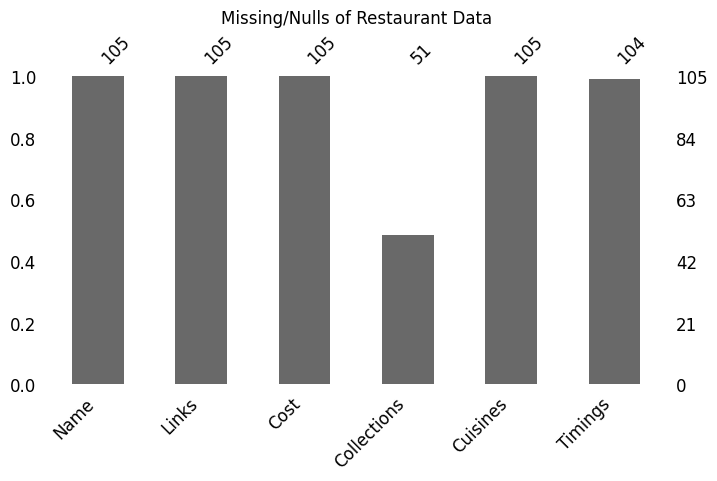

In [ ]:
# Visualizing the missing values


msno.bar(restaurant_df,figsize=(8,4), fontsize=12);
plt.title('Missing/Nulls of Restaurant Data')

In [ ]:
# Missing Values/Null Values Count
review_df.isna().sum()


Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

Text(0.5, 1.0, 'Missing/Nulls of Review Data')

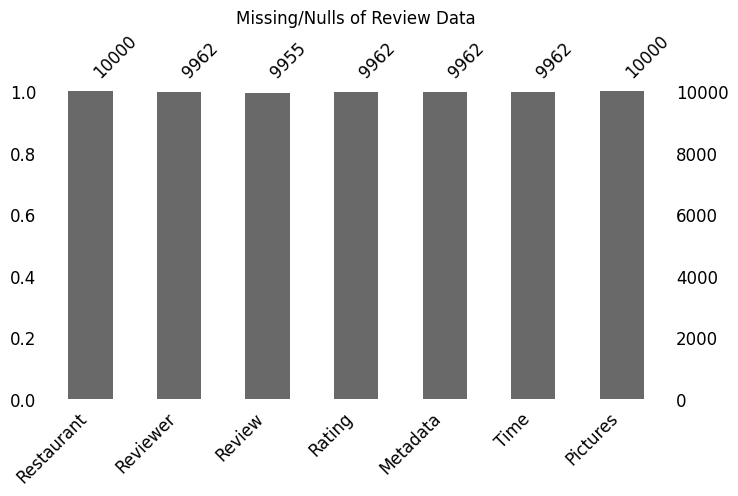

In [ ]:
# Visualizing the missing values


msno.bar(review_df,figsize=(8,4), fontsize=12);
plt.title('Missing/Nulls of Review Data')

### What did you know about your dataset?

We have two datasets in our project as follows:




Restaurant Dataset(restaurant_df):-

It contains 105 rows and 6 features.

*  It contains 105 rows and 6 features.
*  Collection and Timing features has null values.
*  No duplicated Values.




Review Dataset(review_df):-


*  It contains 10000 rows and 7 features.
*  Reviewer, Review, Rating, Metadata, Time have null values
*  36 duplicated rows.

These datasets contain valuable information about restaurants such as their names, cost, cuisines, and customer reviews.


## ***2. Understanding Your Variables***

We take a look at the different variables and their significance in the following section

In [ ]:
# Dataset Columns
restaurant_df.columns


Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [ ]:
# Dataset Describe
restaurant_df.describe()


,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [ ]:
# Dataset Columns
review_df.columns


Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [ ]:
# Dataset Describe
review_df.describe()


,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


In [ ]:
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


### Variables Description

Variable Description of Restaurant Dataset




*  Name - Name of Restaurant


*  Links - URL link of Restaurants


*   Cost - cost of dining per person


*   Collections -Category under Zomato, into which restaurant comes under.


*  Cuisines - Cuisines available in the restaurant

*  Timings - Restaurant open times.




Variable Description of Review Dataset


*  Restaurant = Name of the restaurant
*  Reviewer = Name of the reviewer


*   Review = Review wriiten by the reviewer
* Rating = Rating given to the restaurant

*   Metadata = Number of reviews given by the reviewer and their follower count






*  Time = Date and Time of Review
* Pictures = Number of pictures posted with review




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
restaurant_df.nunique()

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [ ]:
# Check Unique Values for each variable.
review_df.nunique()

Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code


 **Dealing with duplicate values**





restaurant_df has no duplicate values as mentioned in the previous section. For review_df:


In [ ]:
#duplicate values in review_df
print(review_df.duplicated().sum())

review_df.drop_duplicates(inplace= True)



36


Ensuring there are no duplicate values

In [ ]:
#checking for duplicate values again
print(review_df.duplicated().sum())


0



 **Dealing with null values**


 restaurant_df:
 From the previous section, we could visualize almost half of 'Collections' has null values.


In [ ]:
restaurant_df.shape

(105, 6)

In [ ]:
restaurant_df.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Filling null with unknown in Collections , dropping null in Timings

In [ ]:
#filling null with unknown in Collections , dropping null in Timings
restaurant_df.Collections = restaurant_df.Collections.fillna('Unknown')
restaurant_df.dropna(inplace = True)


In [ ]:
restaurant_df.isnull().sum()

Name           0
Links          0
Cost           0
Collections    0
Cuisines       0
Timings        0
dtype: int64

review_df: We could see the number of null values in review_df in the previous section. Dropping null values as shown below.

In [ ]:
review_df.dropna(axis = 0, inplace= True)

In [ ]:
review_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

Missing values and duplicates have been dealt with in both dataframes.


Cost column of restaurant_df is converted into int datatype






In [ ]:
restaurant_df['Cost']=restaurant_df['Cost'].str.replace(",","").astype('int64')


Taking a look at types of values in 'Rating' of review_df, we can see that only one is 'Like', hence it is dropped.

In [ ]:
review_df.Rating.value_counts()


5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [ ]:
review_df.drop(review_df[(review_df['Rating']=='Like')].index,inplace=True)
review_df['Rating']= review_df['Rating'].astype('float64')



Rating is converted into float datatype.

Metadata containing number of reviews and number of followers is seperated into actual columns and 'Metadata' is dropped. The new columns are converted to int datatype.

In [ ]:
review_df['Reviewer_Total_Reviews']=review_df['Metadata'].str.split(',').str[0]
review_df['Reviewer_Followers']=review_df['Metadata'].str.split(',').str[1]
review_df['Reviewer_Total_Reviews'] = review_df['Reviewer_Total_Reviews'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
review_df['Reviewer_Followers'] = review_df['Reviewer_Followers'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
#Filling null values with 0
review_df['Reviewer_Followers'] = review_df['Reviewer_Followers'].fillna(0)
review_df['Reviewer_Followers'] = review_df['Reviewer_Followers'].astype(int)
#dropping 'Metadata' since data has been extracted
review_df=review_df.drop(columns=['Metadata'])
#converting time to datetime format
review_df['Time']=pd.to_datetime(review_df['Time'])
review_df['Review_Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Review_Month'] = pd.DatetimeIndex(review_df['Time']).month


In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Restaurant              9954 non-null   object        
 1   Reviewer                9954 non-null   object        
 2   Review                  9954 non-null   object        
 3   Rating                  9954 non-null   float64       
 4   Time                    9954 non-null   datetime64[ns]
 5   Pictures                9954 non-null   int64         
 6   Reviewer_Total_Reviews  9954 non-null   int64         
 7   Reviewer_Followers      9954 non-null   int64         
 8   Review_Year             9954 non-null   int64         
 9   Review_Month            9954 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 855.4+ KB


In [ ]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviewer_Total_Reviews,Reviewer_Followers,Review_Year,Review_Month
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2,2019,5
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2,2019,5
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3,2019,5
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1,2019,5
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2,2019,5


Now that the data is cleaned and datatypes have been converted, we attempt to get insights.

In [ ]:
#maximum cost of dishes served
restaurant_df.sort_values('Cost', ascending = False)[['Name','Cost']][:5]


,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
18,10 Downing Street,1900
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


In [ ]:
#Number of Reviews for each restaurant
MostReviewedRestaurant=review_df['Restaurant'].value_counts().to_frame()
MostReviewedRestaurant

,Restaurant
Beyond Flavours,100
KS Bakers,100
The Indi Grill,100
The Tilt Bar Republic,100
Yum Yum Tree - The Arabian Food Court,100
...,...
The Old Madras Baking Company,99
Amul,99
Hyderabad Chefs,98
Arena Eleven,85


In [ ]:
#Finding restaurants with highest average ratings
review_df.groupby('Restaurant')['Rating'].mean().sort_values(ascending=False)

Restaurant
AB's - Absolute Barbecues         4.880
B-Dubs                            4.810
3B's - Buddies, Bar & Barbecue    4.760
Paradise                          4.700
Flechazo                          4.660
                                  ...  
Behrouz Biryani                   2.825
Mathura Vilas                     2.820
Pakwaan Grand                     2.710
Asian Meal Box                    2.580
Hotel Zara Hi-Fi                  2.400
Name: Rating, Length: 100, dtype: float64

In [ ]:
#Function to find Total number of Cuisines in dataset

def NumOfCuisines():
    cuisines = set()
    for cuisine_str in restaurant_df['Cuisines']:
       cuisine_list=cuisine_str.split(', ')
       cuisines.update(cuisine_list)
    print(len(cuisines))
NumOfCuisines()

44


In [ ]:
# spliting the cusines and storing in list
cuisine_value_list = restaurant_df.Cuisines.str.split(', ')

# storing all the cusines in a dict
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1

In [ ]:
#Creating a merged dataset to aid  chart creation
restaurant_df1 = restaurant_df.rename(columns = {'Name':'Restaurant'})
merged_df = restaurant_df1.merge(review_df, on = 'Restaurant')
merged_df.shape
merged_df.head()

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Time,Pictures,Reviewer_Total_Reviews,Reviewer_Followers,Review_Year,Review_Month
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2,2019,5
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2,2019,5
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3,2019,5
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1,2019,5
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2,2019,5


### What all manipulations have you done and insights you found?


*   Missing/null values and duplicates have been dealt with in both datasets.
* Cost column of restaurant_df is converted into int datatype

*  In review_df, Rating is converted into float datatype.


*   In review_df, Metadata containing number of reviews and number of followers is seperated into actual columns and 'Metadata' is dropped. The new columns are converted to int datatype

*   List of restuarants with maximum dish cost was observed.
*   AB's Absolute Barbeque had the highest average rating of 4.8. Other high and low average rating restaurants are given above.


*   2.4 was the lowest average rating.

*   A total of 44 different cuisines are in the restaurant_df dataset.
*   Number of reviews for each restaurant in the review_df ranges from 77 to 100, meaning all the restaurants have almost the same number of reviews.









## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

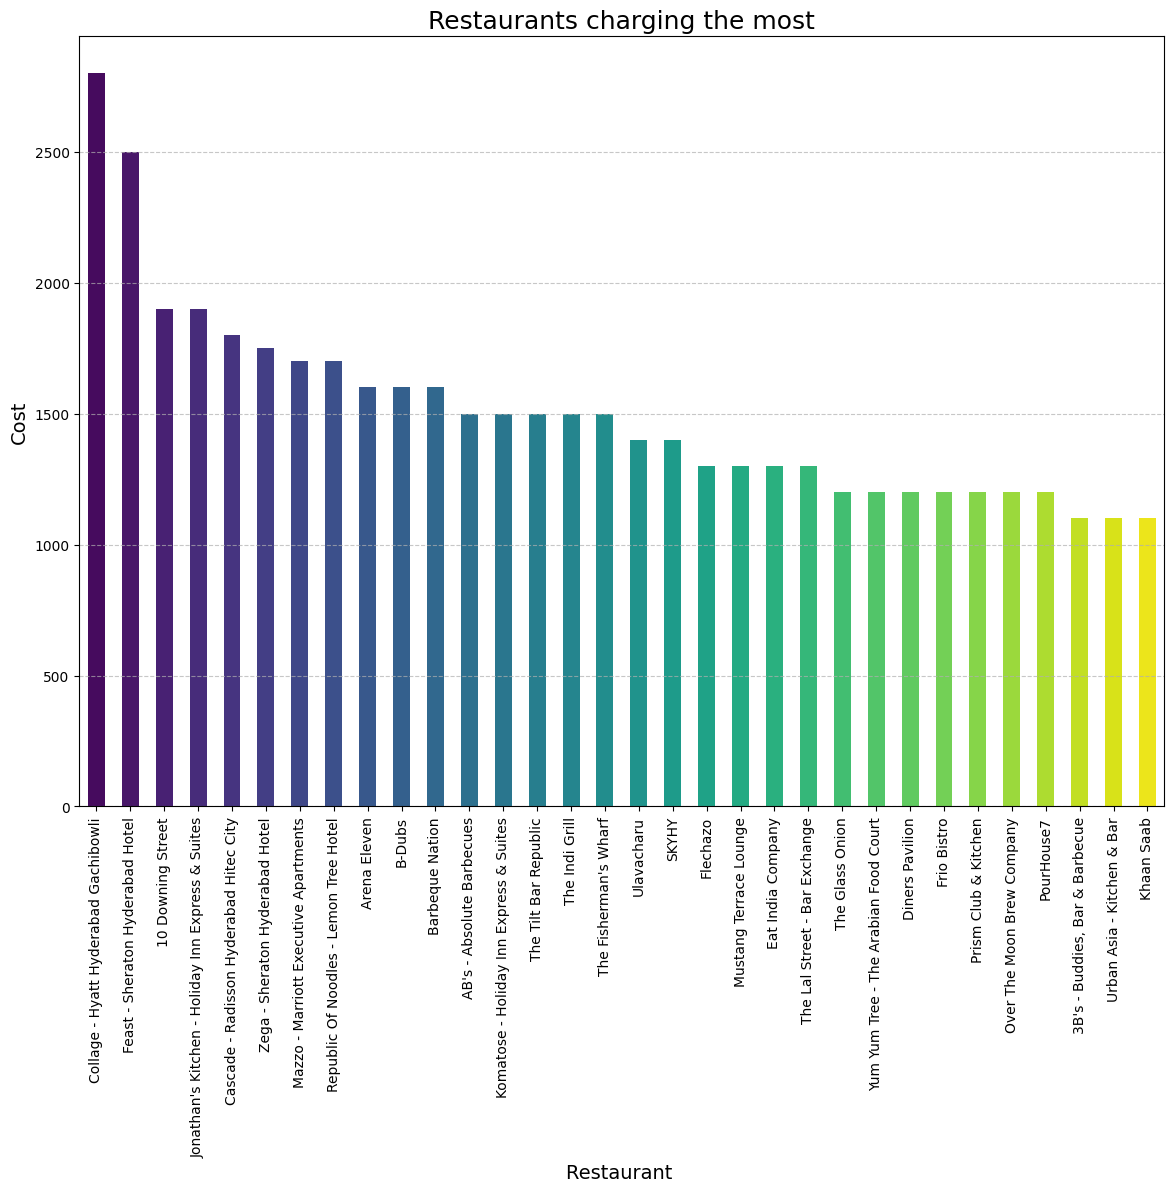

In [ ]:
# Chart - 1 visualization code
rest_cost=restaurant_df[restaurant_df['Cost']>1000].reset_index()
colors = sns.color_palette("viridis", len(rest_cost['Name']))
plt.figure(figsize=(14, 10))
rest_cost.groupby(rest_cost['Name'])['Cost'].max().sort_values(ascending=False).plot(kind='bar', color=colors)

plt.title('Restaurants charging the most', fontsize=18)
plt.xlabel('Restaurant ', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?



*  This bar chart was chosen to visualize the restaurants offering the costliest food.



##### 2. What is/are the insight(s) found from the chart?



*   The most priced food is in the range of Rs.2000


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying the type of food served and the ratings of the reviewers could help in a comparative study.

#### Chart - 2

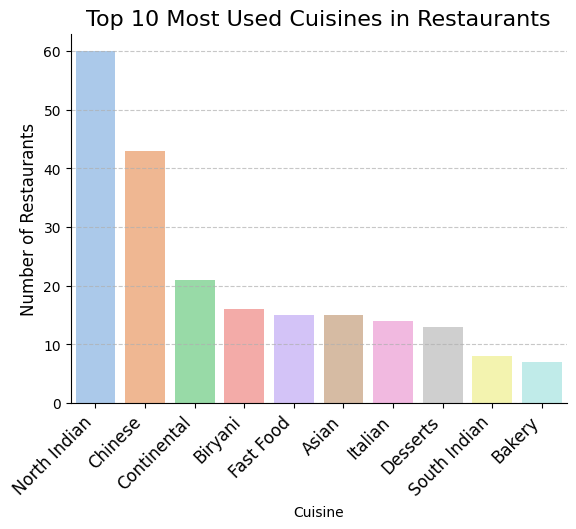

In [ ]:
# Chart - 2 visualization code
#spliiting individual words in cuisine
cuisine_list = restaurant_df['Cuisines'].str.split(', ').apply(lambda x : [word for word in x] )
cuisinedict = {}
for x in cuisine_list:
  for cuisine in x:
    if cuisine in cuisinedict:
      cuisinedict[cuisine] += 1
    else :
      cuisinedict[cuisine] = 1
top_cuisines = pd.DataFrame(((k,vals) for k,vals in cuisinedict.items()),columns=['Cuisine','Number of restaurants']).sort_values(by= 'Number of restaurants' ,ascending=False).head(10)

colors = sns.color_palette("pastel")


sns.barplot(x=top_cuisines['Cuisine'], y=top_cuisines['Number of restaurants'], palette=colors)
plt.title("Top 10 Most Used Cuisines in Restaurants", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()


##### 1. Why did you pick the specific chart?



*  This bar chart was chosen to identify the most used cuisines in restaurants



##### 2. What is/are the insight(s) found from the chart?


*  North Indian cuisines are the most preferred.
*  South Indian cuisines and bakeries are least available.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


*   Above chart could help restaurants in identfying the area of demand, thereby increasing profit.




#### Chart - 3

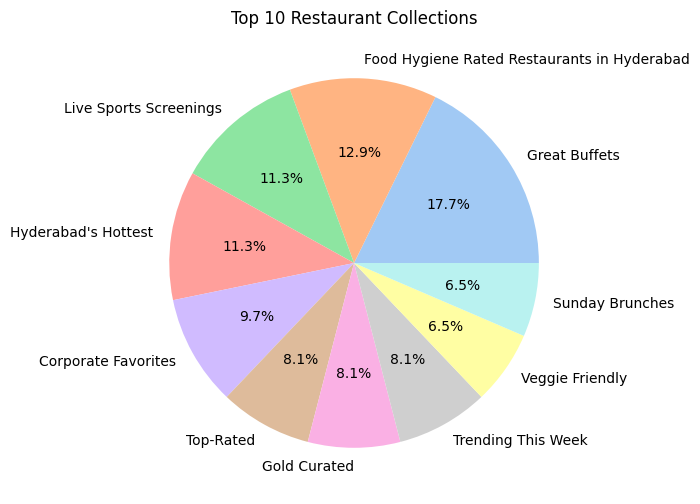

In [ ]:
#Chart 3 visualization code
#Identifying number of restaurants falling under particular collections
coll_list = restaurant_df['Collections'].dropna().apply(lambda x: [collection.strip() for collection in x.split(', ')])
coll_dict = {}
for collections in coll_list:
    for collection in collections:
        if collection in coll_dict:
            coll_dict[collection] += 1
        else:
            coll_dict[collection] = 1

coll_top = pd.DataFrame(((k, vals) for k, vals in coll_dict.items()),
 columns=['Collection', 'Restaurant Count']).sort_values(by='Restaurant Count', ascending=False)
coll_top= coll_top.iloc[1:, :]



plt.figure(figsize=(10, 6))
plt.pie(coll_top['Restaurant Count'].head(10), labels=coll_top['Collection'].head(10), autopct='%1.1f%%', colors=sns.color_palette('pastel'))

plt.title('Top 10 Restaurant Collections')

plt.show()


##### 1. Why did you pick the specific chart?


*   This piechart is used to identify the most popular Collections of Zomato



##### 2. What is/are the insight(s) found from the chart?


*   Great Buffets are the most popular,
*   Sunday brunches, veggie friendly are the least.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*  Identifying the most popular collections and promoting it more could result in higher sales



#### Chart - 4

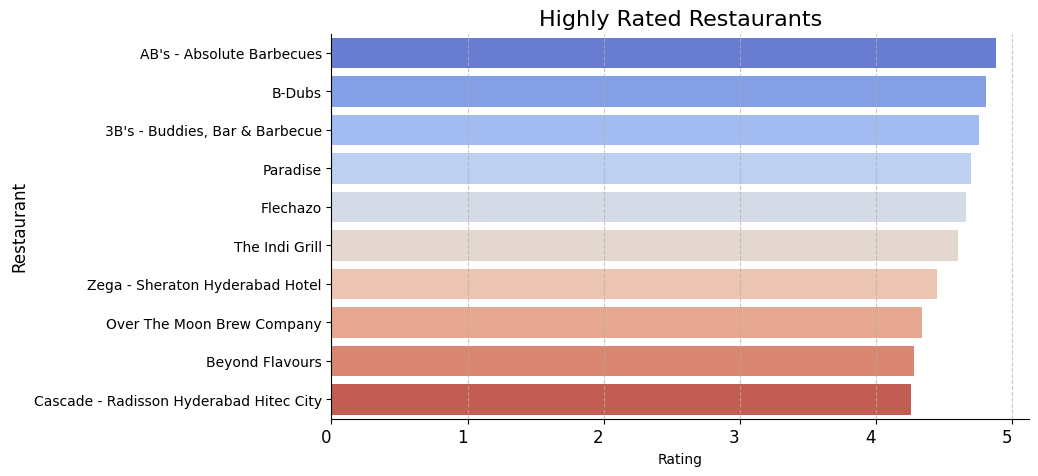

In [ ]:
# Chart - 4 visualization code
#using merged df from data manipulation

prices_ratings = merged_df.groupby('Restaurant').agg({'Rating': 'mean', 'Cost': 'mean'}).reset_index().rename(columns={'Cost': 'Cost of food'})
rate_df = prices_ratings.sort_values('Rating', ascending=False)

plt.rcParams['figure.figsize'] = (9, 5)
colors = sns.color_palette("coolwarm", n_colors=10)
sns.barplot(data=rate_df[:10], x='Rating', y='Restaurant', palette=colors)
plt.title('Highly Rated Restaurants', fontsize=16)
plt.xticks(rotation=0, ha="right", fontsize=12)
plt.ylabel("Restaurant", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()


##### 1. Why did you pick the specific chart?

To visualize most positively rated restaurants, this horizontal bar chart is used.

##### 2. What is/are the insight(s) found from the chart?

The list of highly rated restaurants is found. AB's Absolute Barbecues has the highest average rating of around 4.8

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Identifying food choices, cuisine strategies of highly rated restaurants can help in understanding people's food choices.

#### Chart - 5

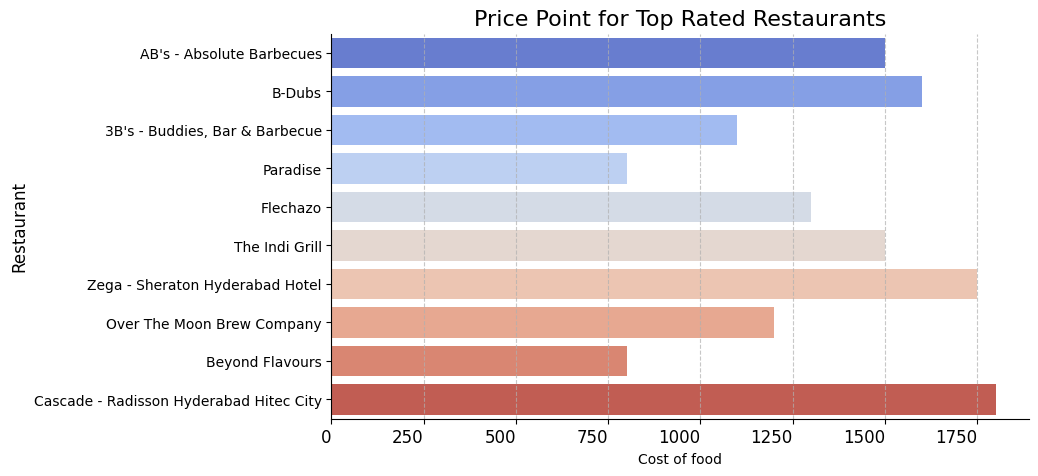

In [ ]:
# Chart - 5 visualization code
plt.rcParams['figure.figsize'] = (9, 5)
colors = sns.color_palette("coolwarm", n_colors=10)
sns.barplot(data=rate_df[:10], x='Cost of food', y='Restaurant', palette=colors)
plt.title('Price Point for Top Rated Restaurants', fontsize=16)
plt.xticks(rotation=0, ha="right", fontsize=12)
plt.ylabel("Restaurant", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.despine()
plt.show()


##### 1. Why did you pick the specific chart?

To observe the cost of meal for highly rated restaurants, the above bar chart was chosen


##### 2. What is/are the insight(s) found from the chart?


*   The general cost of food ranges from 750 to 1750.

*   Spending habits of people can be visualized using this graph, though the cost of AB's is around 1500, it is the most positively rated.




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


*   Pricing strategy decisions and spending habit analysis could help in positive business growth




#### Chart - 6

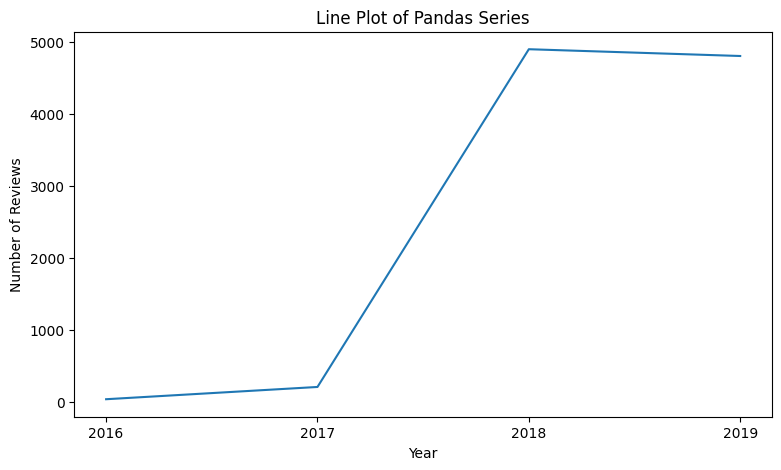

In [ ]:
# Chart - 6 visualization code

(review_df.Review_Year.value_counts().sort_index()).plot(kind='line')

plt.title('Line Plot of Pandas Series')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.xticks(range(int(min(review_df.Review_Year)), int(max(review_df.Review_Year)) + 1, 1))

plt.show()


##### 1. Why did you pick the specific chart?



*   This line chart was chosen to analyse the number of reviews recieved over the years




##### 2. What is/are the insight(s) found from the chart?

*   The number of reviews rises drastically from 2017 to 2018

*   The number of reviews appears to be stagnant after 2018


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.




*   Reviews provide valuable feedback for the organization, ways to increase number of reviews must be analysed.






#### Chart - 7

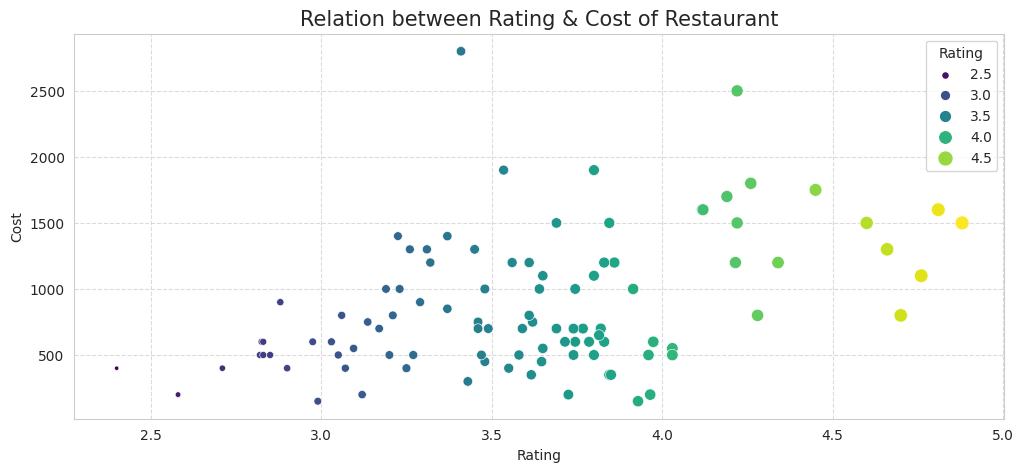

In [ ]:
# Chart - 7 visualization code

plt.figure(figsize=(12, 5))
merged_df1 = merged_df.groupby('Restaurant').agg({'Cost': 'mean', 'Rating': 'mean'}).reset_index()
sns.set_style('whitegrid')


sns.scatterplot(data=merged_df1, x='Rating', y='Cost', size='Rating', sizes=(10, 100), hue="Rating", palette='viridis')

plt.title('Relation between Rating & Cost of Restaurant', size=15)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

##### 1. Why did you pick the specific chart?


*   This scatterplot is chosen to find if cost and rating are related.




##### 2. What is/are the insight(s) found from the chart?



*  Low cost restaurants recieve majority of ratings between 3 to 4 stars.


*   Cost of 700-1500 recieved the very few 5 star rating




##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*  High price does not translate to high ratings is one inference of the above graph



#### Chart - 8

<ipython-input-53-63488bdd65c4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl= merged_df.corr()


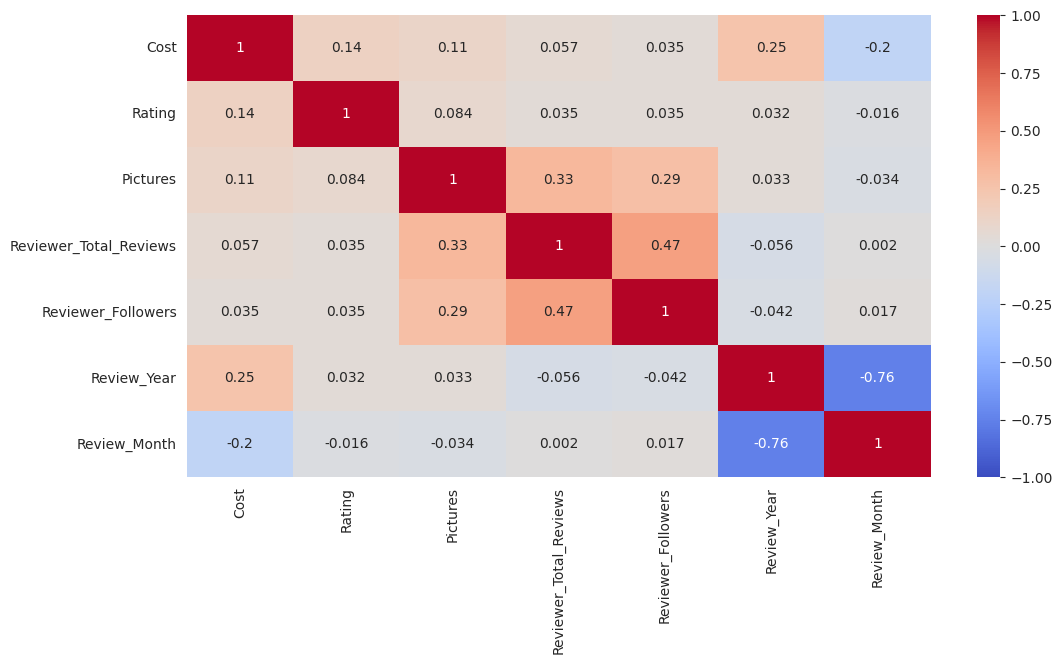

In [ ]:
# Chart - 8 visualization code
correl= merged_df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correl, cmap='coolwarm', annot=True, vmin=-1, vmax=1)
plt.show()

##### 1. Why did you pick the specific chart?


*   Coorelation heatmap is used to identify relations between the variables.





##### 2. What is/are the insight(s) found from the chart?



*   There is a slight (25%) positive relation between review year and cost.
*   Reviewers, their followers and the number of pictures they post are all positively coorelated. 47% between Total reviews and followers.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights are benefical for increasing reviewer's following.

#### Chart - 15 - Pair Plot

In [ ]:
figsize=(8, 8)
sns.pairplot(merged_df, diag_kind="hist")


##### 1. Why did you pick the specific chart?

Relationship between pairs of numerical columns of out dataset is seen using

the pairplot

##### 2. What is/are the insight(s) found from the chart?

One insight obtained is, the number of pictures upload by reviewers increases when the rating is high.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

The cost of a restaurant is positively correlated with it's rating



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.





*   Null hypothesis:
The cost of a restaurant is unrelated to the rating it receives. (H0: 𝛽1 = 0)

*  Alternative hypothesis:The rating a restaurant receives is positively correlated with its cost. (H1: 𝛽1 > 0)






#### 2. Perform an appropriate statistical test.

In [ ]:

# Conduct a statistical test to derive the p-value.
import statsmodels.formula.api as smf

#Fitting Linear Model
model = smf.ols(formula='Rating ~ Cost', data= merged_df).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

##### Which statistical test have you done to obtain P-Value?


 Utilized a linear regression test to examine the correlation between a restaurant's cost and its rating.


##### Why did you choose the specific statistical test?

This test is selected  due to its common usage and simplicity in assessing the association between two continuous variables. This involves constructing a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value associated with the coefficient for the cost variable is then utilized to check whether a statistically significant relationship exists between the two variables.

### Hypothetical Statement - 2

Restaurants that are reviewed by reviewers with more followers will have a higher rating



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   Null hypothesis: The number of followers a reviewer has has no effect on the rating of a restaurant. (H0: 𝛽1 = 0)
*  Alternative hypothesis: Alternative Hypothesis: The number of followers a reviewer has has a positive effect on the rating of a restaurant. (H1: 𝛽1 > 0)



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Reviewer_Followers', data = merged_df).fit()

# print the summary of the model
print(model.summary())

# extract p-value of coefficient for Reviewer_Followers
p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

##### Which statistical test have you done to obtain P-Value?

Simple Linear Regression Test was used.



##### Why did you choose the specific statistical test?


This test was opted because of its simplicity in exploring the connection between two continuous variables. This method assumes a linear relationship between the independent variable (Reviewer_Followers) and the dependent variable (Rating), enabling to gauge the strength and direction of that relationship. Additionally, it allows me to assess the null hypothesis, which posits no relationship between the two variables, by examining the p-value of the coefficient associated with the independent variable.

### Hypothetical Statement - 3

Restaurants that offer a wider variety of cuisines will have a higher rating.



#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.




*   Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)
* Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)



#### 2. Perform an appropriate statistical test.

In [ ]:

# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged_df['Cuisines'], merged_df['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

##### Which statistical test have you done to obtain P-Value?

For the third hypothesis, we have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating.

##### Why did you choose the specific statistical test?

This test was chosen because it is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.



## **6. Feature Engineering & Data Pre-processing**

### 1. Handling Missing Values

Missing and duplicate values were handled in section 3 Data Wrangling. A summary of the techniques used is given below.

#### What all missing value imputation techniques have you used and why did you use those techniques?

First, we check for duplicate values, restaurant_df had 36 duplicates which were dropped.
Next we find 54 null values in collections and 1 in Timings. We replace null with 'Unknown' in collections and drop the null value in 'Timings'.
A relatively smaller number of null values was found in review_df, hence it was dropped.
A relatively smaller number of duplicate values was found in review_df, hence it was dropped.

### 2. Handling Outliers

In [ ]:
#cost distribution
sns.set_palette("pastel")

plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Cost'], kde=True, bins=20, color='skyblue')
plt.title("Distribution of Restaurant Costs", fontsize=16)
plt.xlabel("Cost", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest
# Load your DataFrame and select the column with the cost data
cost_col =merged_df["Cost"].values.reshape(-1, 1)

# Create isolation forest object and fit to data
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(cost_col)

# Predict anomalies in data
# df['anomaly'] = isolation_forest.predict(cost_col)

# Visualize anomalies as shaded region
xx = np.linspace(cost_col.min(), cost_col.max(), len(cost_col)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10, 4))
plt.plot(xx, anomaly_score, label='anomaly score', color='blue')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='red', alpha=0.3, label='outlier region')

plt.legend()
plt.xlabel('Cost')
plt.ylabel('Anomaly Score')
plt.show()

In [ ]:
# Handling Outliers & Outlier treatments

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = merged_df['Cost'].quantile(0.25)
Q3 = merged_df['Cost'].quantile(0.75)

# Calculate the IQR value
iqr = Q3 - Q1

# Capping the Cost using IQR technique
# Calculate the lower limit and upper limit
lower_limit = Q1 - (1.5 * iqr)
upper_limit = Q3 + (1.5 * iqr)

# Replace any values below the lower bound with the lower bound
merged_df.loc[merged_df['Cost'] < lower_limit, 'Cost'] = lower_limit

# Replace any values above the upper bound with the upper bound
merged_df.loc[merged_df['Cost'] > upper_limit, 'Cost'] = upper_limit

##### What all outlier treatment techniques have you used and why did you use those techniques?

We specifically focus on the 'Cost' numerical column in our dataset for restaurant clustering. Initially, we employed the Isolation Forest algorithm from the scikit-learn library to detect anomalies or outliers within the 'Cost' feature. Recognizing the presence of skewed distribution among these outliers, we subsequently applied the Interquartile Range (IQR) technique. This involved capping the outliers by establishing lower and upper bounds using the appropriate formula.

###3. Categorical Encoding

In [ ]:
# Rename the 'Name' column to 'Restaurant'
restaurant_df = restaurant_df.rename(columns={'Name': 'Restaurant'})
# Create a dummy dataframe for categorical encoding
cluster_dummy = restaurant_df[['Restaurant', 'Cuisines']]
# Split cuisines (separated by commas) and convert to a list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
# Explode the list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')
# Remove extra trailing spaces from cuisines
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
# Use get_dummies to create dummy variables for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])
# Check the correctness of values (index of the max value in each row)
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]
# Replace "Cuisines_" from column names
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_", "")
# Group by 'Restaurant' and sum the dummy variables
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()


In [ ]:
#total cuisine count
restaurant_df['Total_Cuisine_Count'] = merged_df['Cuisines'].apply(lambda x : len(x.split(',')))

In [ ]:
#Average engagement of restaurants
avg_hotel_rating = review_df.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

In [ ]:
#adding average rating
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
restaurant_df = restaurant_df.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')

In [ ]:
#add cost column to the new dataset
cluster_dummy = restaurant_df[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')

In [ ]:
cluster_dummy.columns

In [ ]:
# data for restaurant clustering
cluster_df_org = cluster_dummy.copy()
cluster_dummy.head(3)

In [ ]:
#creating data frame for categorial encoding
cluster_df = restaurant_df[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]
#creating new dataframe for clustering
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

In [ ]:
#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0

In [ ]:
cluster_dummy.shape

####What all categorical encoding techniques have you used & why did you use those techniques?

One hot encoding technique was used for Cuisine column. 1 was given if Cuisine was present 0 if absent

### 4. Textual Data Preprocessing


#### 1. Expand Contraction

In [ ]:
#creating new df for text processing of sentiment analysis
sentiment_df = review_df[['Reviewer','Restaurant','Rating','Review']]
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index

In [ ]:
#analysing three random sample
sentiment_df.sample(3)

In [ ]:
# Expand Contraction
import contractions
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [ ]:
# Lower Casing of Reviews
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

####3. Removing Punctuations

In [ ]:
# Remove Punctuations
import string
# create a translator for removing punctuation
translator = str.maketrans('', '', string.punctuation)
# remove punctuation
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: x.translate(translator))

####4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [ ]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
restaurant_df['Location'] = restaurant_df['Links'].apply(get_location)

####5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
# extracting the stopwords from nltk library
stop_words = stopwords.words('english')

In [ ]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in stop_words]
  # joining the list of words with space separator
  return " ".join(text)

In [ ]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

In [ ]:
#make copy data in sentiments_df
sentiments_df = sentiment_df.copy()

In [ ]:
# Apply Tokenization on review data
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)
sentiment_df.sample(2)

####8. Text Normalization

In [ ]:
#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)

#####Which text normalization technique have you used and why?
In this section, stemming and lemmatization is used. Lemmatization is a targeted form of text normalization that involves reducing words to their base or root form, referred to as a lemma. This process proves advantageous for Zomato reviews analysis as it contributes to enhanced accuracy in sentiment analysis and other text analysis methods. By Reducing words to their base form, lemmatization provides the identification and grouping of related words, even when presented in different forms (e.g., "jogging," "jogged," and "jogs" reduced to "jog"). This approach provides a more comprehensive understanding of the language used in the reviews, thereby refining the analysis results.

####9. Part of speech tagging

**Not Required**


Using POS tagging may not be very helpful for reviews because they usually use simple language with fewer variations in word types, unlike other types of text such as news articles or academic papers.
POS tagger may struggle with informal language used in reviews

####10. Text Vectorization


In [ ]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

#####Which text vectorization technique have you used and why?
we opted for the TF-IDF vectorizer because it's widely favored for text vectorization. TF-IDF stands out for its ability to accurately portray the significance of each word in a text document, enhancing precision in analysis and modeling. This proves especially beneficial for tasks like sentiment analysis, topic modeling, and information retrieval.

###4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
restaurant_df.shape

In [ ]:
#columns for dataset
restaurant_df.columns

Dropping Links after extraction, Dropping Location as it has no valuable information.

In [ ]:
#dropping columns
hotel = restaurant_df.drop(columns = ['Links','Location'], axis = 1)

In [ ]:
#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(
    lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)  #1 = positive # 0 = negative

####2. Feature Selection

In [ ]:
#feature selected for sentiment analysis
sentiment_df.columns

#####What all feature selection methods have you used and why?

Principal component analysis will be used for feature selection. Dimensionality will be dealt with in clustering problems.

#####Which all features you found important and why?
 'Cuisines', 'Cost', 'Rating are important for restaurant clustering. ForTopic modeling from Reviews data, we have selected reviews text data and converted that to tf-idf vectors.

####5. Data Transformation

In [ ]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])


The transformation of features, like log transforming right-skewed data, is carried out to enhance the performance and interpretability of machine learning models. This is especially beneficial when working with data that exhibits skewness or lacks a normal distribution .It's noteworthy that other numerical features adhere to a symmetric distribution of data.

####6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Select the numerical variables to standardize
numerical_vars = ['Cost','Total_Cuisine_Count','Average_Rating']

# Standardize the numerical variables using StandardScaler
scaler = StandardScaler()
scaled_df = cluster_dummy.copy()
scaled_df[numerical_vars] = scaler.fit_transform(cluster_dummy[numerical_vars])

####Which method have you used to scale you data and why?

We utilized the Standard Scaler because the variables involved have different scales and ranges, and this diversity can impact clustering outcomes. For instance, if the cost of a meal has a much larger range than the rating, the clustering algorithm might overly emphasize the cost variable during clustering. Standardizing numerical variables puts them on a consistent scale and range, ensuring that each variable contributes equally to the clustering process. This equal weighting enhances the reliability and interpretability of the clustering results.

When we standardize numerical variables, it aids in the improved performance of specific clustering algorithms, like K-means, which relies on Euclidean distance as a similarity metric.

###7. Dimesionality Reduction

In [ ]:
# DImensionality Reduction (If needed)
from sklearn.decomposition import PCA
pca = PCA()

# Fit the PCA object to your standardized data
scaled_df.set_index(['Restaurant'],inplace=True)
pca.fit(scaled_df)

# Get explained variance ratio of each principal component
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

# visualising the cummulative variance
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(cumulative_var, marker='o', color='purple')
ax.set_xlabel("Number of Components")
ax.set_ylabel("Cumulative Explained Variance")
ax.set_title("Cumulative Explained Variance vs Number of Components")
plt.xlim([0, 15])

# Add background color and style
ax.set_facecolor('#f7f7f7')
ax.grid(color='white', linestyle='--', linewidth=1)

plt.show()

In [ ]:
#using n_component as 3
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_df)

# transform data to principal component space
pca_df = pca.transform(scaled_df)

# variance explained by three components
print(f'Cumulative variance explained by 3 principal components: {np.sum(pca.explained_variance_ratio_)}')

#####Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We applied Principal Component Analysis (PCA) as it's a widely used unsupervised method for simplifying high-dimensional datasets while preserving most of the inherent variation.

In our case, with over 40 features, using all of them for clustering could create a high-dimensional space, making it tough to visualize and analyze the data. PCA addresses this by transforming the original features into a new set of orthogonal features that capture the essential patterns in the data. These new features, known as principal components, are arranged by the amount of variance they capture in the original data. This approach helps us effectively manage the complexity of the dataset

####8. Data Splitting

Not Required

The train-test split is a technique for evaluating the performance of a machine learning algorithm. primary used for classification or regression problems and can be used for any supervised learning algorithm. Since This is an Unsuppervised ML problem and we dont require an a validation data, we are not going to use this.

## ***7. ML Model Implementation***

###ML Model - 1 KMeans Clustering


In [ ]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans

In [ ]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(pca_df)
    wcss.append(km.inertia_)

In [ ]:
#elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="b", marker ="o")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.title('Elbow Curve')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

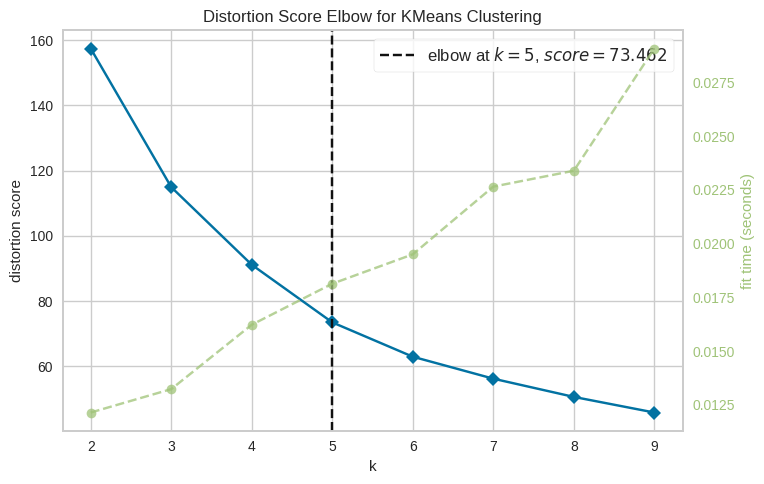

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Finding optimum number of Clusters
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=4) # create KMeans clustering object

# create KElbowVisualizer object
visualizer = KElbowVisualizer(model, k=(2,10), size=(800, 520))

# fit the visualizer to the data
visualizer.fit(pca_df)

# display the elbow plot
visualizer.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 average silhouette_score is : 0.3260181336243321
For n_clusters = 3 average silhouette_score is : 0.31565203748787884


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 average silhouette_score is : 0.3188690439357531
For n_clusters = 5 average silhouette_score is : 0.31473393244971515


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 average silhouette_score is : 0.3103879890257807


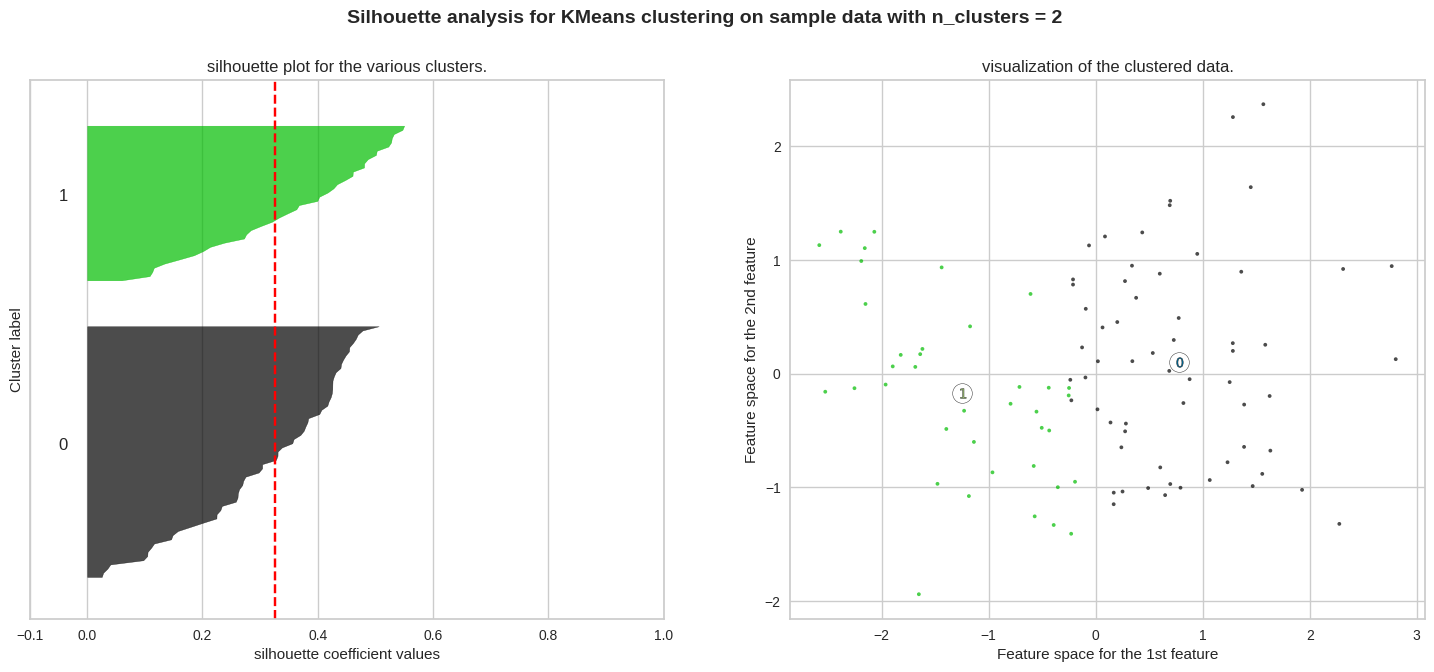

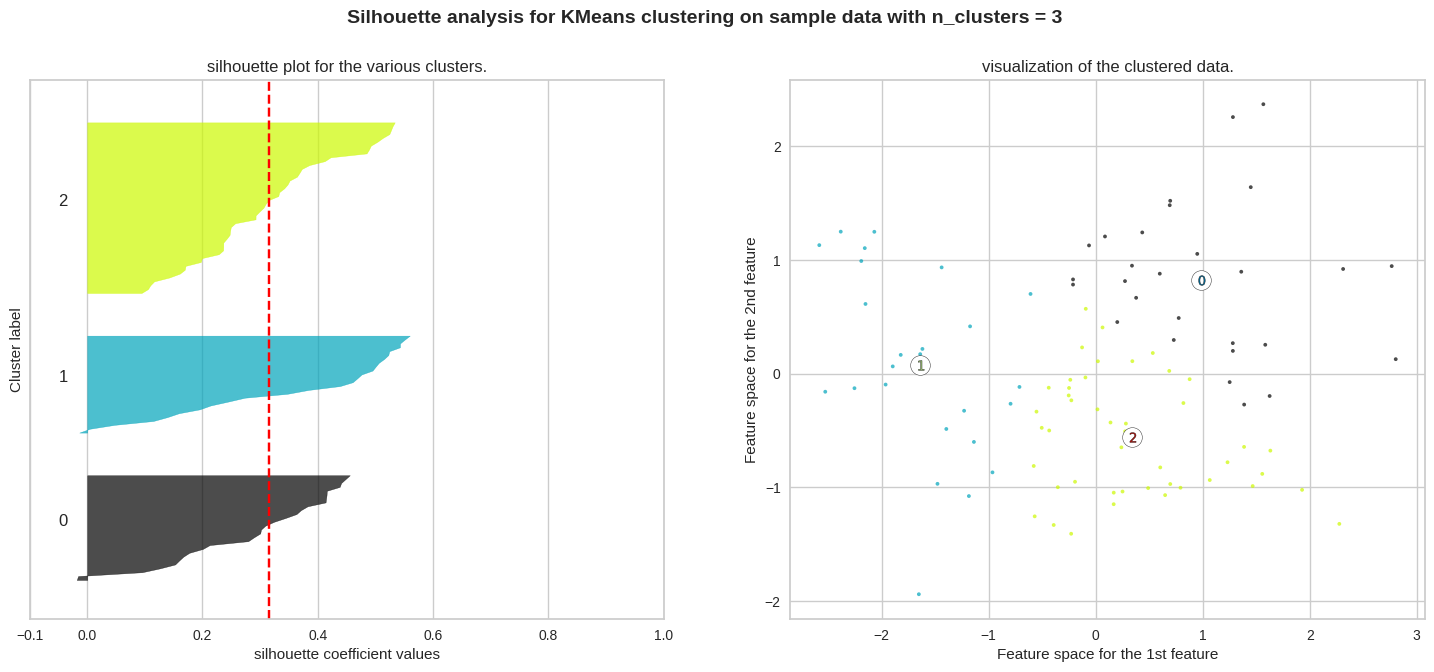

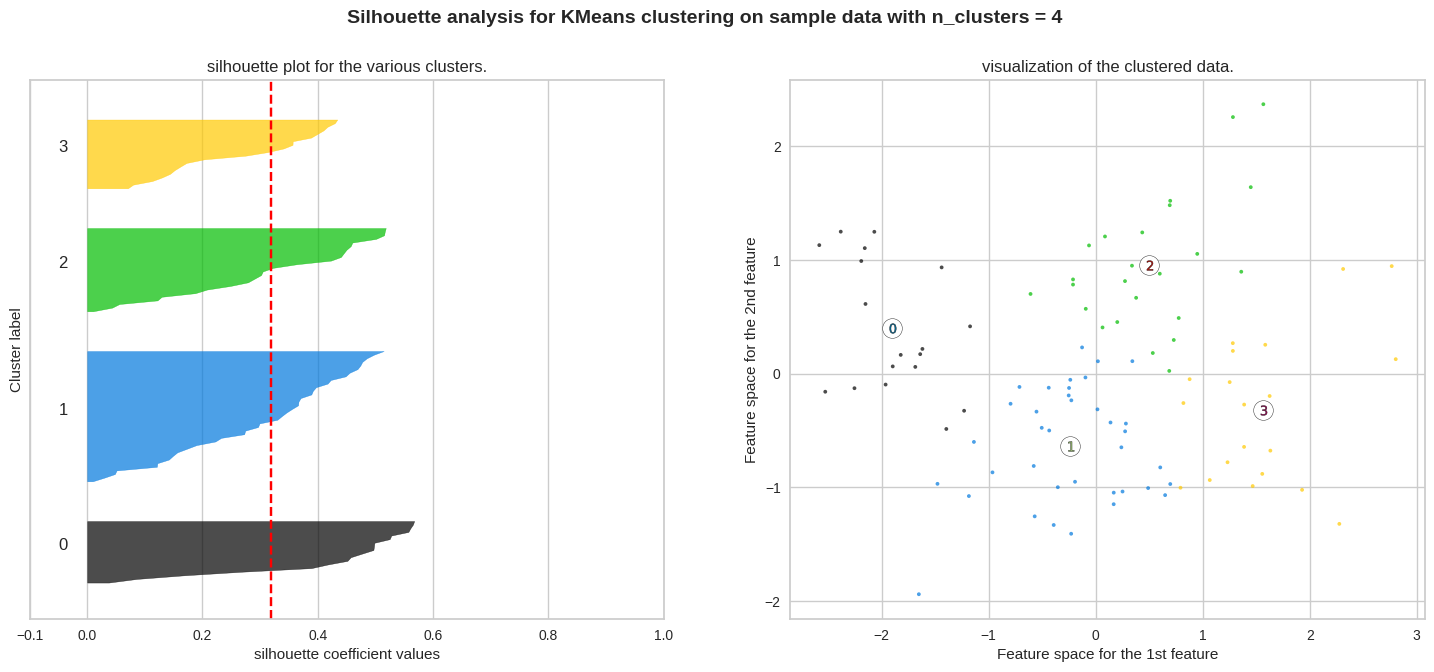

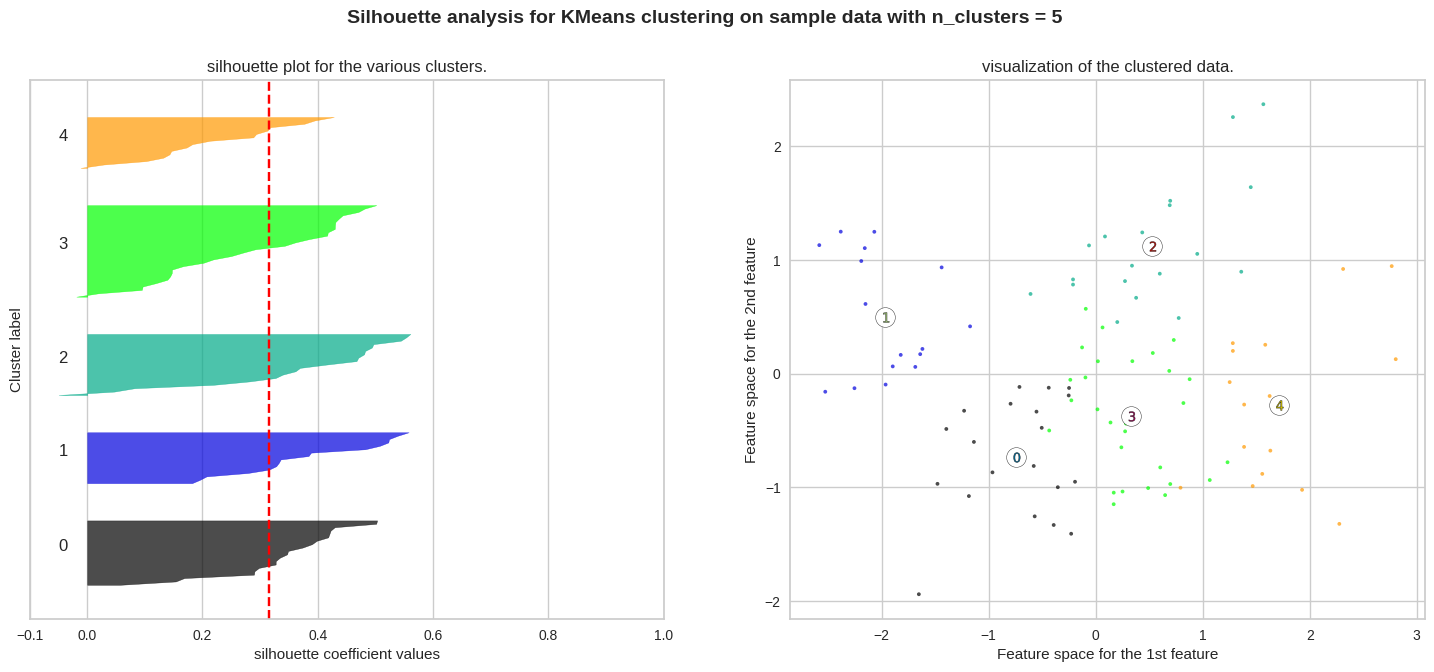

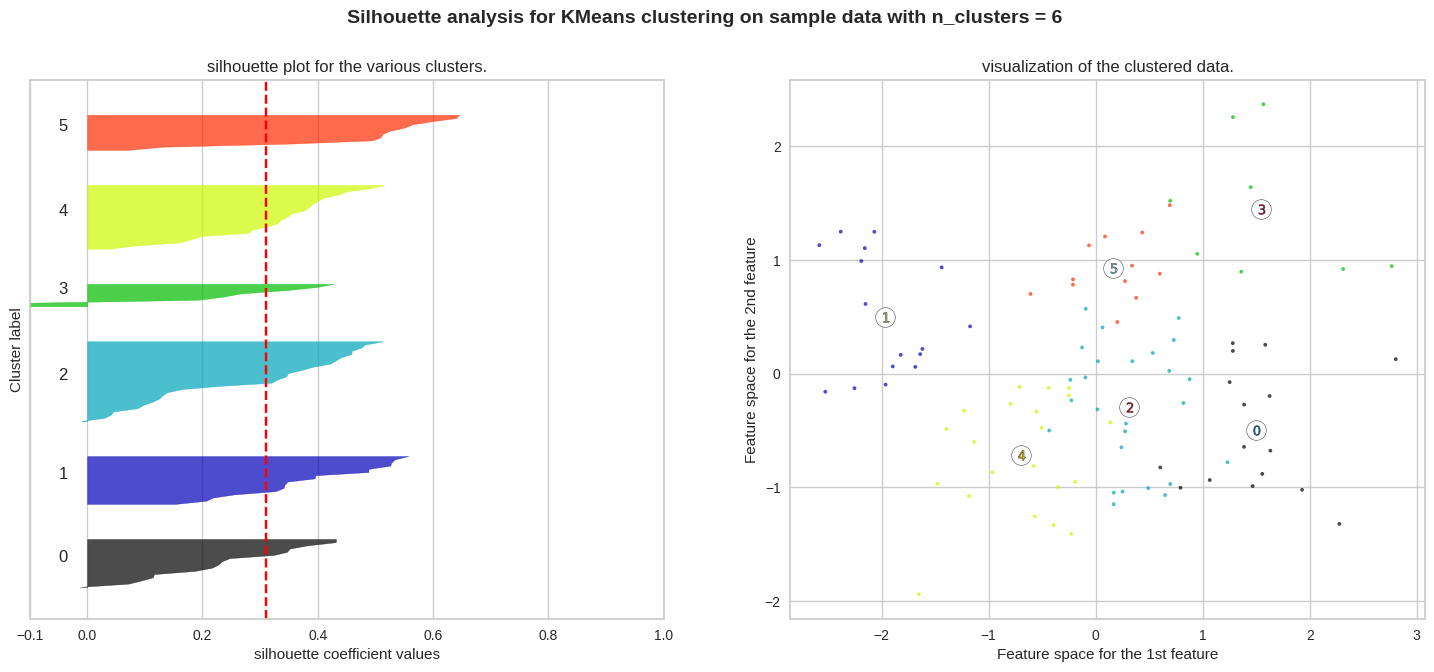

In [ ]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
import matplotlib.cm as cm

# candidates for the number of cluster
parameters = list(range(2,7))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pca_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_df)
# silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pca_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

         # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_df[:, 0], pca_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='${}$'.format(i), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


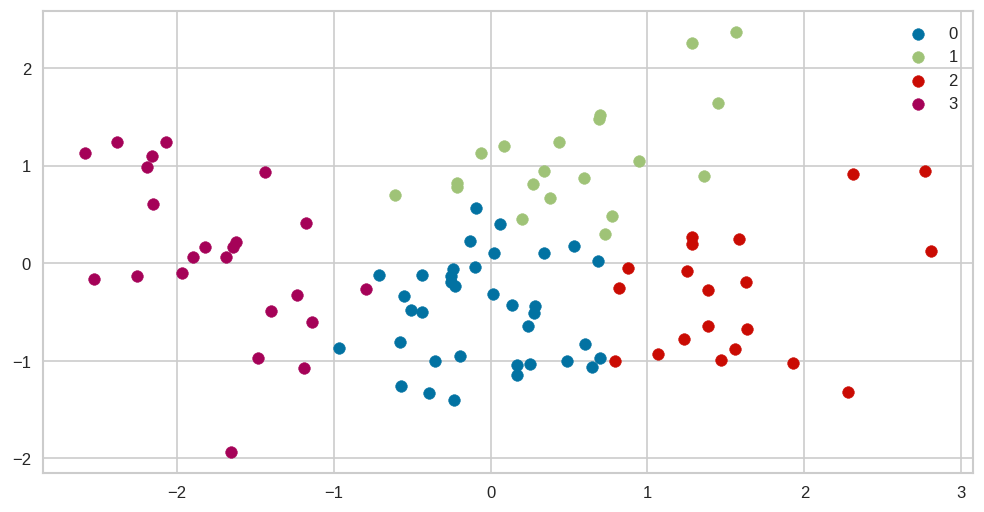

In [ ]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,5), dpi = 120)

kmeans= KMeans(n_clusters = 4, init= 'k-means++', random_state = 42)
kmeans.fit(pca_df)

#predict the labels of clusters.
label = kmeans.fit_predict(pca_df)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(pca_df[label == i , 0] , pca_df[label == i , 1] , label = i)
plt.legend()
plt.show()

####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
* K-Means Clustering is an algorithm used to group data points into clusters based on their similarity. The algorithm works by grouping similar data points into 'k' number of clusters, where 'k' is a predefined number. It then calculates the centroid or mean of each cluster and continues to iterate until it finds the best fit and minimizes the total within-cluster variation. This technique is useful for organizing or classifying data in a dataset, which can be used for further analysis or decision-making. It is a centroid-based algorithm, where each cluster is associated with a centroid.
* We will Use the KElbowVisualizer to find the optimal number of clusters Koptimal.  The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?
* **Silhouette Score Metric** - The silhouette score is a metric commonly used to evaluate a model's performance in unsupervised machine learning. It measures how well each data point is matched to its own cluster compared to other clusters, providing a range from -1 to 1 with a score of 1 indicating a perfect match and -1 indicating the worst possible match. The silhouette score can be used to identify groups of data that are highly similar and separated from other groups. The Silhouette Score is a metric commonly used to assess the quality of clustering algorithms in machine learning. It is based on the average distance between an item and all other items in its own cluster, versus the average distance of that item and all items in other clusters. A higher score indicates a better clustering.

In [ ]:
#making df for pca
kmeans_pca_df = pd.DataFrame(pca_df,columns=['PC1','PC2','PC3'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(2)

,PC1,PC2,PC3,label
Restaurant,,,,
Flechazo,-2.158465,1.103375,0.210708,3
Labonel,-0.609404,0.700791,-0.617297,1


In [ ]:
#joining the cluster labels to names dataframe
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
Al Saba Restaurant,6.621406,3.136364,6,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
The Tilt Bar Republic,7.313887,3.845000,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


### ML Model - 2 Agglomerative Hierarchical Clustering

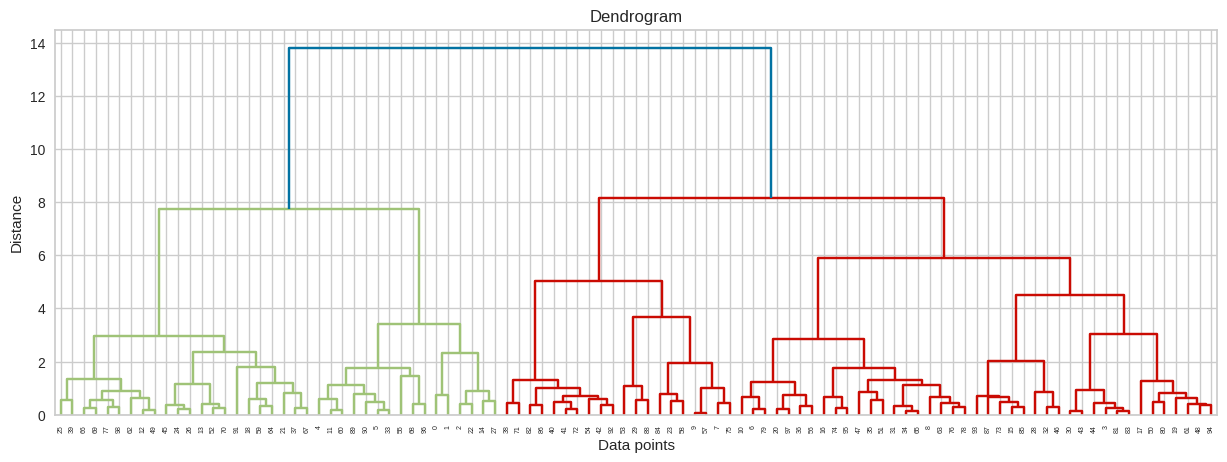

In [ ]:
# ML Model - 3 Implementation
from scipy.cluster.hierarchy import linkage, dendrogram

# calculate the linkage matrix
Z = linkage(pca_df, method='ward', metric='euclidean')

# plot the dendrogram
plt.figure(figsize=(15, 5))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

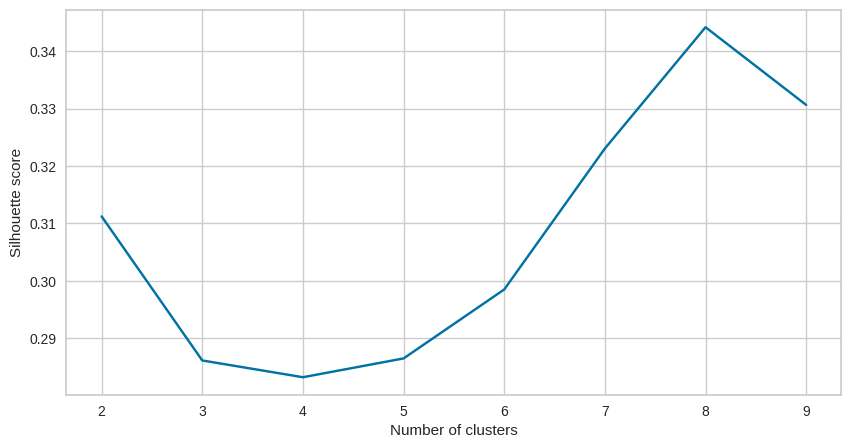

In [ ]:
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(10, 5))

silhouette_scores = []
# loop through different values of k
for k in range(2, 10):
    # create KMeans clustering object with k clusters
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agg_label = model.fit_predict(pca_df)

    # calculate the silhouette score
    score = silhouette_score(pca_df, agg_label)

    # append the score to the list
    silhouette_scores.append(score)

# plot the silhouette scores against the number of clusters
plt.plot(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [ ]:
# initialize AgglomerativeClustering with 4 clusters
agg_cluster = AgglomerativeClustering(n_clusters=6, linkage='ward')

# fit the model to the data points
agg_cluster.fit(pca_df)

# assign each data point to a cluster
agg_labels = agg_cluster.labels_


####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import silhouette_score

# calculate Silhouette score
agg_silhouette_avg = silhouette_score(pca_df, agg_labels)

print(f'Silhoutte Score for Agglomorative Clustering with clusters=6 is {agg_silhouette_avg}')

Silhoutte Score for Agglomorative Clustering with clusters=6 is 0.29851526478051194


<Axes: >

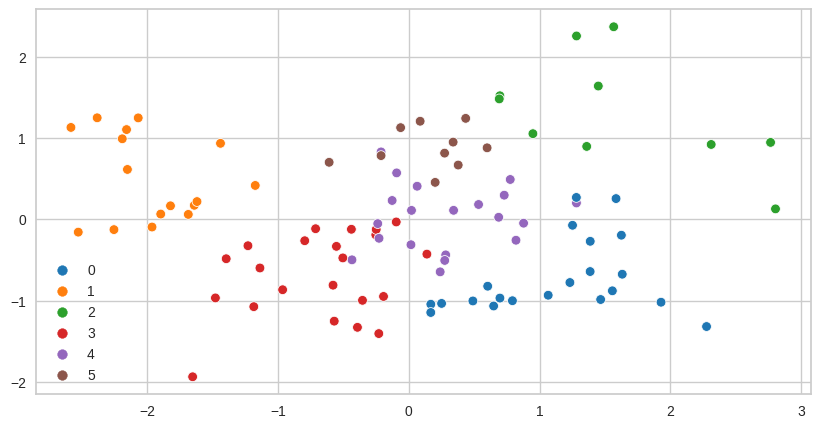

In [ ]:
# Lets see the clusters using 2-d plot of PC1 and PC2
plt.figure(figsize=(10, 5))

# using scatterplot to plot PC1 and PC2 with hue as labels
sns.scatterplot(data=pca_df, x=pca_df[:,0], y=pca_df[:,1], hue=agg_labels, palette='tab10')

####1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* Agglomerative Hierarchical Clustering (AHC) is an unsupervised machine learning algorithm used to cluster a collection of data points into groups based on similarities in their features. AHC uses a bottom-up approach, starting with individual points as clusters and successively combining them until the entire dataset is divided into distinct clusters. It is useful for organizing large datasets into understandable smaller subgroups (clusters) where similar samples are grouped together and dissimilar samples are placed in different clusters.

* We have used Hierarchial Clustering - Agglomerative Model to cluster the restaurants based on different features. This model uses a down-top approach to cluster the data.We have used Silhouette Coefficient Score and used 6 clusters and then vizualized the clusters and the datapoints within it.

###Choosing Optimum Clusters
Since, K-means clustering helps us to achieve Silhoutte score of more than 0.3 with number of clusters as 4, we are going to use Kmeans labels to define our clusters in the data, now lets visualize the clusters in 2 dimensions, PC1 and PC2

####Visualizing the Clusters

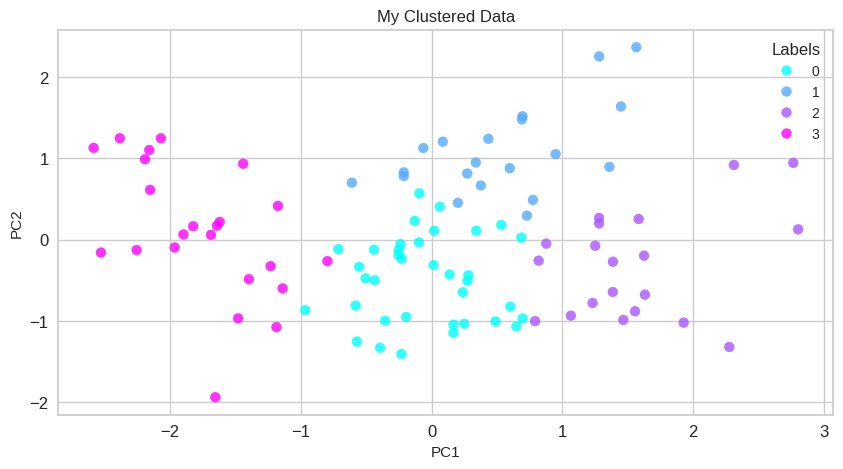

In [ ]:
# Converting the PCA data matrix into a Pandas Dataframe
pca = pd.DataFrame(columns=['pc1', 'pc2', 'pc3'])
pca['pc1'] = pca_df[:,0]
pca['pc2'] = pca_df[:,1]
pca['pc3'] = pca_df[:,2]
pca['labels'] = kmeans.labels_

# Create scatter plot with larger and thicker data points
plt.figure(figsize=(10, 5))
scatter = plt.scatter(x=pca['pc1'], y=pca['pc2'], c=pca['labels'], s=50, cmap='cool', alpha=0.8)
plt.title('My Clustered Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, labels, loc='best', title='Labels')

plt.show()

PCA helped in reducing the dimensionality of data and visualizing it in a 2D space. By employing k-means clustering with 4 clusters, we managed to group similar data points together, and these groups are visually represented in different colors on the scatterplot. The resulting plot demonstrates well-separated and distinct clusters, providing us with a clearer understanding of patterns in our data. This visualization aids in drawing meaningful insights for our project

In [ ]:
# adding cluster labels to the original restaurants data
cluster_d = restaurant_df[['Restaurant', 'Cost', 'Average_Rating', 'Cuisines']]
cluster_d['labels'] = kmeans.labels_

<ipython-input-108-2beb5ee03440>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_d['labels'] = kmeans.labels_


###Cluster 1 - Premium Continental Restaurants

In [ ]:
cluster_d[cluster_d['labels']==0]

,Restaurant,Cost,Average_Rating,Cuisines,labels
3,Shah Ghouse Hotel & Restaurant,800,3.210000,"Biryani, North Indian, Chinese, Seafood, Bever...",0
8,Hyper Local,1000,3.640000,"American, Chinese, North Indian, Kebab, South ...",0
12,Absolute Sizzlers,750,3.620000,"Continental, American, Chinese",0
13,The Lal Street - Bar Exchange,1300,3.450000,"North Indian, Italian, Finger Food",0
24,SKYHY,1400,3.370000,"North Indian, Chinese, Continental",0
25,Tiki Shack,1000,3.480000,Continental,0
26,Mustang Terrace Lounge,1300,3.310000,"Mexican, Italian, North Indian, Chinese, Salad",0
30,Pista House,1000,3.230000,"Bakery, North Indian, Mughlai, Juices, Chinese",0
31,Marsala Food Company,700,3.460000,"Arabian, North Indian, Chinese",0
34,Green Bawarchi Restaurant,700,3.490000,"North Indian, Chinese, Biryani",0


###Cluster 2 - Local Street/Fast Food

In [ ]:
cluster_d[cluster_d['labels']==1]

,Restaurant,Cost,Average_Rating,Cuisines,labels
7,Shah Ghouse Spl Shawarma,300,3.430000,Lebanese,1
9,Cream Stone,350,3.845000,"Ice Cream, Desserts",1
16,NorFest - The Dhaba,550,4.030000,North Indian,1
20,13 Dhaba,450,3.480000,North Indian,1
23,Amul,150,3.929293,"Ice Cream, Desserts",1
38,Deli 9 Bistro,700,3.820000,"Cafe, Continental, Desserts",1
40,Karachi Bakery,500,3.800000,"Bakery, Fast Food, Desserts",1
41,Karachi Cafe,600,3.715000,"Cafe, Desserts, Fast Food",1
42,The Foodie Monster Kitchen,500,3.580000,"American, Wraps, Desserts",1
54,Cafe Eclat,700,3.590000,"Cafe, Bakery",1


###Cluster 3 - International Cuisines

In [ ]:
cluster_d[cluster_d['labels']==2]

,Restaurant,Cost,Average_Rating,Cuisines,labels
6,eat.fit,500,3.200000,"Healthy Food, North Indian, Continental, South...",2
10,Sardarji's Chaats & More,400,3.250000,"Street Food, North Indian, Fast Food",2
15,KFC,500,2.850000,"Burger, Fast Food",2
17,Hotel Zara Hi-Fi,400,2.400000,"Chinese, North Indian",2
19,Pakwaan Grand,400,2.710000,"North Indian, Chinese, Biryani",2
28,Behrouz Biryani,600,2.825000,"Mughlai, Biryani",2
29,Hunger Maggi Point,200,3.120000,Fast Food,2
32,Club Rogue,900,2.880000,"North Indian, Fast Food",2
48,Mathura Vilas,500,2.820000,"South Indian, North Indian, Chinese",2
50,Hitech Bawarchi Food Zone,500,3.050000,"Biryani, North Indian, Chinese",2


###Cluster 4 - Cafe, Ice Creams and Desserts

In [ ]:
cluster_d[cluster_d['labels']==3]

,Restaurant,Cost,Average_Rating,Cuisines,labels
0,Beyond Flavours,800,4.280000,"Chinese, Continental, Kebab, European, South I...",3
1,Paradise,800,4.700000,"Biryani, North Indian, Chinese",3
2,Flechazo,1300,4.660000,"Asian, Mediterranean, North Indian, Desserts",3
4,Over The Moon Brew Company,1200,4.340000,"Asian, Continental, North Indian, Chinese, Med...",3
5,The Fisherman's Wharf,1500,4.220000,"Seafood, Goan, North Indian, Continental, Asian",3
11,Barbeque Nation,1600,4.120000,"Mediterranean, North Indian, Kebab, BBQ",3
14,AB's - Absolute Barbecues,1500,4.880000,"European, Mediterranean, North Indian",3
18,10 Downing Street,1900,3.800000,"North Indian, Chinese, Continental",3
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900,3.535000,"North Indian, Japanese, Italian, Salad, Sushi",3
22,B-Dubs,1600,4.810000,American,3


####1. Which Evaluation metrics did you consider for a positive business impact and why?

* We applied the k-means algorithm to group restaurants based on their cost, rating, and cuisines. To assess the clustering model's effectiveness, we used the Silhouette score as our evaluation metric. The Silhouette score analyses the similarity of data points within a cluster and the dissimilarity between different clusters. A higher Silhouette score signifies superior clustering results, indicating that data points within a cluster are more alike and less similar to data points in other clusters. This higher score can positively impact business by uncovering meaningful patterns and insights, offering valuable information for informed decisions regarding restaurant operations, marketing strategies, and customer satisfaction.

####2. Which ML model did you choose from the above created models as your final prediction model and why?

* The final prediction model employed was the KMeans clustering algorithm. We opted for KMeans over the Agglomerative Hierarchical clustering algorithm due to its superior performance, as shown by better silhouette scores. KMeans is a commonly used efficient clustering algorithm capable of handling both large and small datasets. It achieves clustering by partitioning the data into k clusters, minimizing the sum of squared distances between each point and the centroid of its cluster. In the context of clustering restaurants based on cost, rating, and cuisines, KMeans emerged as the most suitable solution for the given problem statement.

####3. Explain the model which you have used and the feature importance using any model explainability tool?

* The model used is K-Means clustering. K-Means clustering is an unsupervised learning algorithm used to group similar data points together. It starts by randomly selecting k centroids, where k is the number of clusters desired. The algorithm then iteratively assigns each data point to the closest centroid and recalculates the centroid of each cluster based on the new assignments. This process continues until the centroids no longer move significantly.

* In terms of feature importance, K-Means clustering does not inherently provide a measure of feature importance as it is an unsupervised learning algorithm. However, the silhouette plot provides a graphical representation of how well each data point fits within its assigned cluster. A high silhouette score indicates that the data point is well-matched to its assigned cluster, while a low score indicates that the data point might be better assigned to a different cluster.

* In summary, while K-Means clustering does not provide a direct measure of feature importance, we can still use model explainability tools such as the silhouette plot and elbow method to gain insights into the underlying structure of the data and the resulting clusters.

###Restaurants falls under the following major categories

*  **Premium Continental Restaurants**    


*   **Local Street/Fast Food**   

*   **International Cuisines**   



*   **Cafe, Ice Creams and Desserts**






##**Sentiment Analysis**

###Supervised Sentiment Analysis

In [ ]:
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review,Sentiment
966,966,Dan,Cream Stone,5.0,"[wonderful, place, ice, cream, favorite, would...",1
4734,4734,Irfan Ali,Shanghai Chef 2,5.0,"[love, place, soup, tom, kha, gai, gung, ask, ...",1
7875,7875,Venu Gopal,Khaan Saab,4.0,"[place, make, feel, like, royal, guest, ambian...",1
2826,2826,Bhavani Sankar Raju Machiraju,Behrouz Biryani,3.0,"[average, coming, taste, feei, lavishness, fee...",0
8044,8044,Chaitanya,Tandoori Food Works,5.0,[good],1


Text(0.5, 1.0, 'Positive, Neutral and Negative Sentiment Counts')

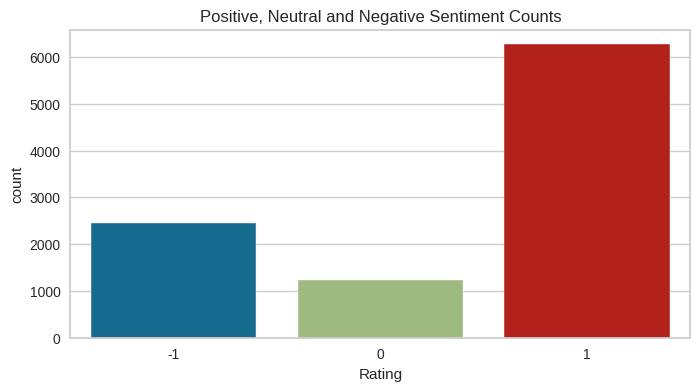

In [ ]:
#assigning ratings into positive, neutral and negative sentiments for visualization
sentiments = sentiment_df['Rating'].apply(lambda rating : 1 if rating > 3.5 else (0 if 3 <= rating <= 3.5 else -1))
#visualizing number of sentiments
plt.figure(figsize=(8,4))
sns.countplot(x=sentiments)
plt.title('Positive, Neutral and Negative Sentiment Counts',size=12)

In [ ]:
#visualizing review text
#importing wordcloud
from wordcloud import WordCloud

#visualizing negative and positive reviews seperately
positive_reviews = sentiments_df[sentiment_df['Sentiment'] == 1]
negative_reviews = sentiments_df[sentiment_df['Sentiment'] == 0]

#since these words were in the overall wordcloud and doesn't contribute in distinguishing between neg and positive sentiments
stopword = stopwords.words('english')
stopword.extend(["food","good",'place','chicken','ordered'])

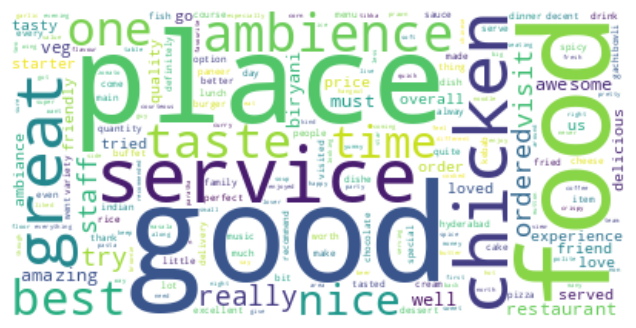

In [ ]:
#positive wordcloud
pos_text = " ".join(review for review in positive_reviews.Review)
plt.figure(figsize=(10,4))
pos_wordcloud = WordCloud(collocations = False, background_color = 'white').generate(pos_text)
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

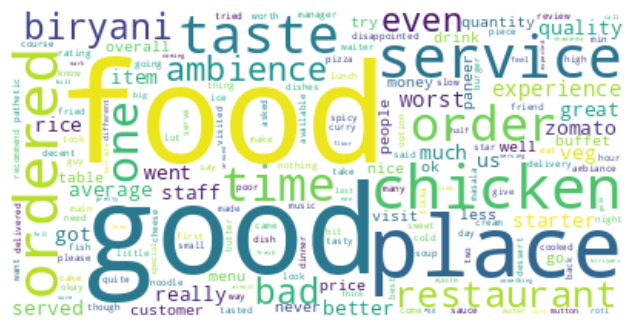

In [ ]:
#negative wordcloud
neg_text = " ".join(review for review in negative_reviews.Review)
plt.figure(figsize=(10,4))
neg_wordcloud = WordCloud(collocations = False, background_color = 'white').generate(neg_text)
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###Data Splitting


In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# for sentiment analysis using sentiment_df dataframe
X = X_tfidf # X taken from text vectorization
y = sentiment_df['Sentiment']

In [ ]:
sentiment_df.shape

(9954, 6)

In [ ]:
#spliting data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# describes info about train and test set
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (7963, 17327)
y_train dataset:  (7963,)
X_test dataset:  (1991, 17327)
y_test dataset:  (1991,)


####ML Model -Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(class_weight='balanced',random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [ ]:
print("Results for Logistic Regression")

y_pred_lr = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
print('accuracy score =',accuracy)
print("\n")
#Confusion matrix
from sklearn.metrics import *
cm_lr = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix')
print(cm_lr)
#evaluation
print(classification_report(y_test,y_pred_lr))

Results for Logistic Regression
accuracy score = 0.8724259166248116


Confusion Matrix
[[ 651   99]
 [ 155 1086]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       750
           1       0.92      0.88      0.90      1241

    accuracy                           0.87      1991
   macro avg       0.86      0.87      0.87      1991
weighted avg       0.88      0.87      0.87      1991



###ML Model - Random Forest Classifier

In [ ]:
#import
from sklearn.ensemble import RandomForestClassifier
#fitting
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
print("Results for Random Forest")

y_pred_rf = forest.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print('accuracy score =',accuracy)
print("\n")

#Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix')
print(cm_lr)
#evaluation
print(classification_report(y_test,y_pred_rf))

Results for Random Forest
accuracy score = 0.8643897538925164


Confusion Matrix
[[ 546  204]
 [  66 1175]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       750
           1       0.85      0.95      0.90      1241

    accuracy                           0.86      1991
   macro avg       0.87      0.84      0.85      1991
weighted avg       0.87      0.86      0.86      1991



####Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
#logistic regression
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]}
lr_grid_cv = GridSearchCV(lr, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall')

In [ ]:
lr_grid_cv.fit(X_train, y_train)

In [ ]:
print("Results for Cross- Validation & Hyperparameter Tuning on Logistic Regression")

y_pred = lr_grid_cv.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy score =',accuracy)
print("\n")

#Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm_lr)
#evaluation
print(classification_report(y_test,y_pred))

In the business scenario, accurately predicting negative sentiments is crucial, but it's even more critical for models to minimize false positives. False positives imply that reviews, originally negative, are incorrectly categorized as positive, potentially causing the oversight of complaints that require attention.

Despite Logistic Regression having a higher count of false negatives compared to Random Forest, it outperforms in reducing false positives. This suggests that Logistic Regression is effectively penalizing false positives, aligning with our preference in the context of this problem.

##Conclusion

* This Zomato restaurant clustering and metadata sentiment analysis project concludes that leveraging natural language processing and machine learning algorithms enables the creation of a model adept at accurately clustering restaurants based on reviews and sentiments. The project has proven instrumental in discerning customer preferences and understanding the profound impact of customer feedback on the restaurant industry.

* We conducted clustering on restaurant data using cost, rating, and cuisines, employing dimensionality reduction techniques for 2D visualization. Following the elbow method and silhouette scores, KMeans clustering with k=4 emerged as the optimal choice.
* Our clustering results revealed four distinct clusters of restaurants:
   1.   Premium Continental Restaurants
   2.   Local Street/Fast Food
   3.   International Cuisines
   4.   Cafe, Ice Creams and Desserts

* Employing sentiment analysis facilitated the classification of review texts as positive or negative, offering a nuanced understanding of customer feedback and pinpointing areas for service improvement. Various feature engineering techniques were applied to extract sentiments, identifying key areas of enhancement based on negative reviews.  
    1. Taste
    2. Price
    3. Behaviour
    4. hygiene
    5. Quality
    6. Service Time
    7. Experience


In the future, we could look into creating a recommendation system based on what users like and rate highly. This project shows how combining data from different places and using various analysis methods can uncover useful information for Zomato and business owners.





.









##**Thank You**